In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
import seaborn as sns
from scipy import stats

In [90]:
blood=pd.read_csv('E:blood.csv')

In [91]:
blood.head()

id  Months since Last Donation  Number of Donations  \
0  619                           2                   50   
1  664                           0                   13   
2  441                           1                   16   
3  160                           2                   20   
4  358                           1                   24   

   Total Volume Donated (c.c.)  Months since First Donation  \
0                        12500                           98   
1                         3250                           28   
2                         4000                           35   
3                         5000                           45   
4                         6000                           77   

   Made Donation in March 2007  
0                            1  
1                            1  
2                            1  
3                            1  
4                            0

In [92]:
blood.var()

id                             4.706634e+04
Months since Last Donation     6.683804e+01
Number of Donations            3.294772e+01
Total Volume Donated (c.c.)    2.059232e+06
Months since First Donation    5.869801e+02
Made Donation in March 2007    1.825000e-01
dtype: float64

In [93]:
blood=blood[blood['Total Volume Donated (c.c.)']<4000]
sns.boxplot(blood['Total Volume Donated (c.c.)'])

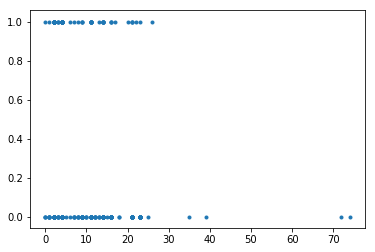

In [94]:
_=plt.scatter(blood['Months since Last Donation'],blood['Made Donation in March 2007'],marker='.')

In [95]:
#blood['Months since Last Donation']=np.log(blood['Months since Last Donation'])

In [96]:
x=blood_new.drop(['Made Donation in March 2007','id'],axis=1)
y=blood_new['Made Donation in March 2007']

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [98]:
dt=DecisionTreeClassifier(max_depth=4)
searcherDT=GridSearchCV(dt,{'criterion':['gini','entropy'],'min_samples_leaf':np.arange(0.1,0.6)})
searcherDT.fit(x_train,y_train)
searcherDT.best_params_
predDT=searcherDT.predict(x_test)
searcherDT.score(x_test,y_test)
roc_auc_score(y_test,predDT)

0.6371370967741935

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
roc_auc_score(y_test,pred)
#searcherKNN.score(x_test,y_test)

0.7853091397849461

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [101]:
logreg=LogisticRegression(penalty='l1',C=0.1)
logreg.fit(x_train,y_train)
grid=logreg.predict(x_test)
roc_auc_score(y_test,grid)

0.5523252688172043

In [102]:
svm=SVC(probability=True)
svm.fit(x_train,y_train)
grid=svm.predict(x_test)
roc_auc_score(y_test,grid)
#searcherSVC.best_score_

0.8742473118279569

In [103]:
bc=BaggingClassifier(base_estimator=knn,n_estimators=30,n_jobs=-1)
bc.fit(x_train,y_train)
y_bc=bc.predict(x_test)
roc_auc_score(y_test,y_bc)

0.8286559139784947

In [104]:
rc=RandomForestClassifier(n_estimators=100,min_samples_leaf=0.1)
rc.fit(x_train,y_train)
y_rc=rc.predict(x_test)
roc_auc_score(y_test,y_rc)

0.5

In [105]:
dm_train=xgb.DMatrix(data=x_train,label=y_train)
dm_test=xgb.DMatrix(data=x_test,label=y_test)
params={'booster':'gblinear','max_depth':5}
xg_reg=xgb.train(params=params,dtrain=dm_train)
y_xg=xg_reg.predict(dm_test)
roc_auc_score(y_test,y_xg)

0.7530376344086022

In [106]:
abc=AdaBoostClassifier(base_estimator=dt,n_estimators=50)
abc.fit(x_train,y_train)
y_abc=abc.predict(x_test)
roc_auc_score(y_test,y_abc)

0.8781182795698924

In [107]:
gtb=GradientBoostingClassifier(n_estimators=50,max_depth=2)
gtb.fit(x_train,y_train)
y_gtb=gtb.predict(x_test)
roc_auc_score(y_test,y_gtb)

0.6631854838709678

In [108]:
classifiers=[('abc',logreg),('log',searcherDT)]
vc=VotingClassifier(estimators=classifiers,voting='soft')
vc.fit(x_train,y_train)
y_vc=vc.predict(x_test)
vc.score(x_test,y_test)
roc_auc_score(y_test,y_vc)

C:\Users\user\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6094623655913978

In [109]:
test=pd.read_csv('E:\\blood_test.csv')
#test1=test.drop(['id'],axis=1)
#dtest=xgb.DMatrix(test1)
test=test.drop('id',axis=1)

In [110]:
y_pred=abc.predict_proba(test)

In [111]:
sub=pd.read_csv('E:\\BloodDonationSubmissionFormat.csv')
final=pd.DataFrame(y_pred)
final.columns=['id','Made Donation in March 2007']
final=final[['id','Made Donation in March 2007']]
sub['Made Donation in March 2007']=y_pred
sub.head()

id  Made Donation in March 2007
0  659                     0.425091
1  276                     0.745128
2  263                     0.511223
3  303                     0.803090
4   83                     0.284658

In [113]:
sub.to_csv('E:\\result.csv')

In [114]:
sub

id  Made Donation in March 2007
0    659                     0.425091
1    276                     0.745128
2    263                     0.511223
3    303                     0.803090
4     83                     0.284658
5    500                     0.209190
6    530                     0.502664
7    244                     0.808352
8    249                     0.995075
9    728                     0.960982
10   129                     0.197439
11   534                     0.683525
12   317                     0.388188
13   401                     0.511223
14   696                     0.412812
15   192                     0.506749
16   176                     0.606641
17   571                     0.235484
18   139                     0.924423
19   423                     0.656152
20   563                     0.513624
21    56                     0.496517
22   528                     0.700829
23   101                     0.511223
24   467                     0.637790
25   382                     0.590238
26   466                     0.503468
27   294                     0.808352
28   512                     0.582496
29   659                     0.425091
..   ...                          ...
170  131                     0.515988
171  405                     0.993494
172   82                     0.511223
173  643                     0.518432
174  156                     0.885287
175  617                     0.940164
176  574                     0.672253
177  272                     0.798277
178  613                     0.869627
179  545                     0.511223
180  685                     0.808352
181  570                     0.686709
182  537                     0.400374
183  691                     0.983465
184   85                     0.684966
185  483                     0.507629
186  455                     0.770714
187   93                     0.506749
188  744                     0.506666
189   33                     0.507629
190  321                     0.623934
191  523                     0.640402
192  426                     0.933618
193  196                     0.909460
194  301                     0.683525
195  103                     0.983465
196  224                     0.691170
197  454                     0.935609
198  585                     0.998072
199  154                     0.865521

[200 rows x 2 columns]